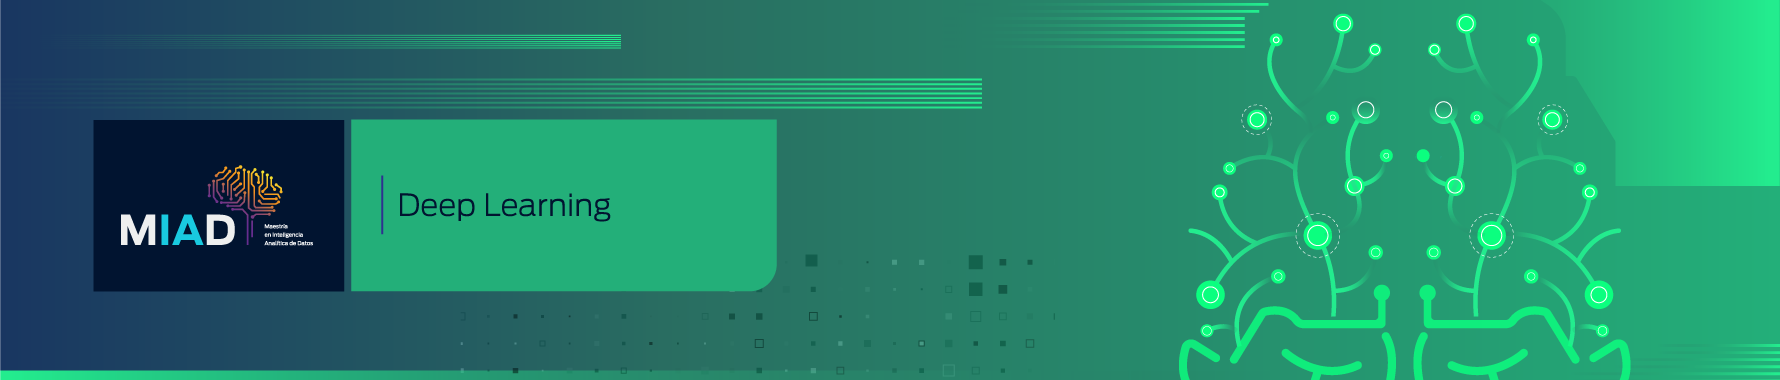

# Estrategias de implementación

## Redes neuronales usando Keras: Implementación en contexto real usando Keras

## Actividad calificada por el personal

### Propósito 

En el laboratorio "Estimación de red neuronal con múltiples capas" se propuso una implementación manual de redes neuronales usando librerías básicas de python como lo son *pandas* y *numpy*. *Google* desarrolló un *API* para el aprendizaje automático cuyo nombre es *"Keras"*, esta es escrita en *python* y es utilizada para hacer implementaciones de redes neuronales simples.

Así, en este *notebook* se pretende evaluar el uso de *keras* al aplicar una red neuronal en un contexto real. 

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios a evaluar

Los criterios que se evaluarán son:

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [30 puntos]

Estimación de un modelo utilizando redes neuronales: Se estima el modelo usando una red neuronal, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado [30 puntos]

Elección del mejor modelo: Se elige la mejor combinación de hiperparámetros de acuerdo a los resultados obtenidos y justifica adecuadamente la selección. [40 puntos]


#### Problema

Un *manager* de un banco manifiesta preocupación porque los clientes están renunciando a las tarjetas de crédito. Este cuenta con los datos disponibles en 
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers a cerca de 10000 clientes, si tiene productos activos o no (*"Attrition flag"*), en función de variables tales como edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc.

Ustedes deben proponer el algoritmo para hacer la clasificación de los clientes con una red neuronal.

Tengan en cuenta que, para resolver los puntos de esta actividad, únicamente deben considerar las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.


### Librerías a importar

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils.vis_utils import plot_model

### 1. Análisis preliminar de variables [30 puntos]

Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

Cantidad de variables independientes continuas: 17
Estadísticas Descriptivas:
       Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75% 

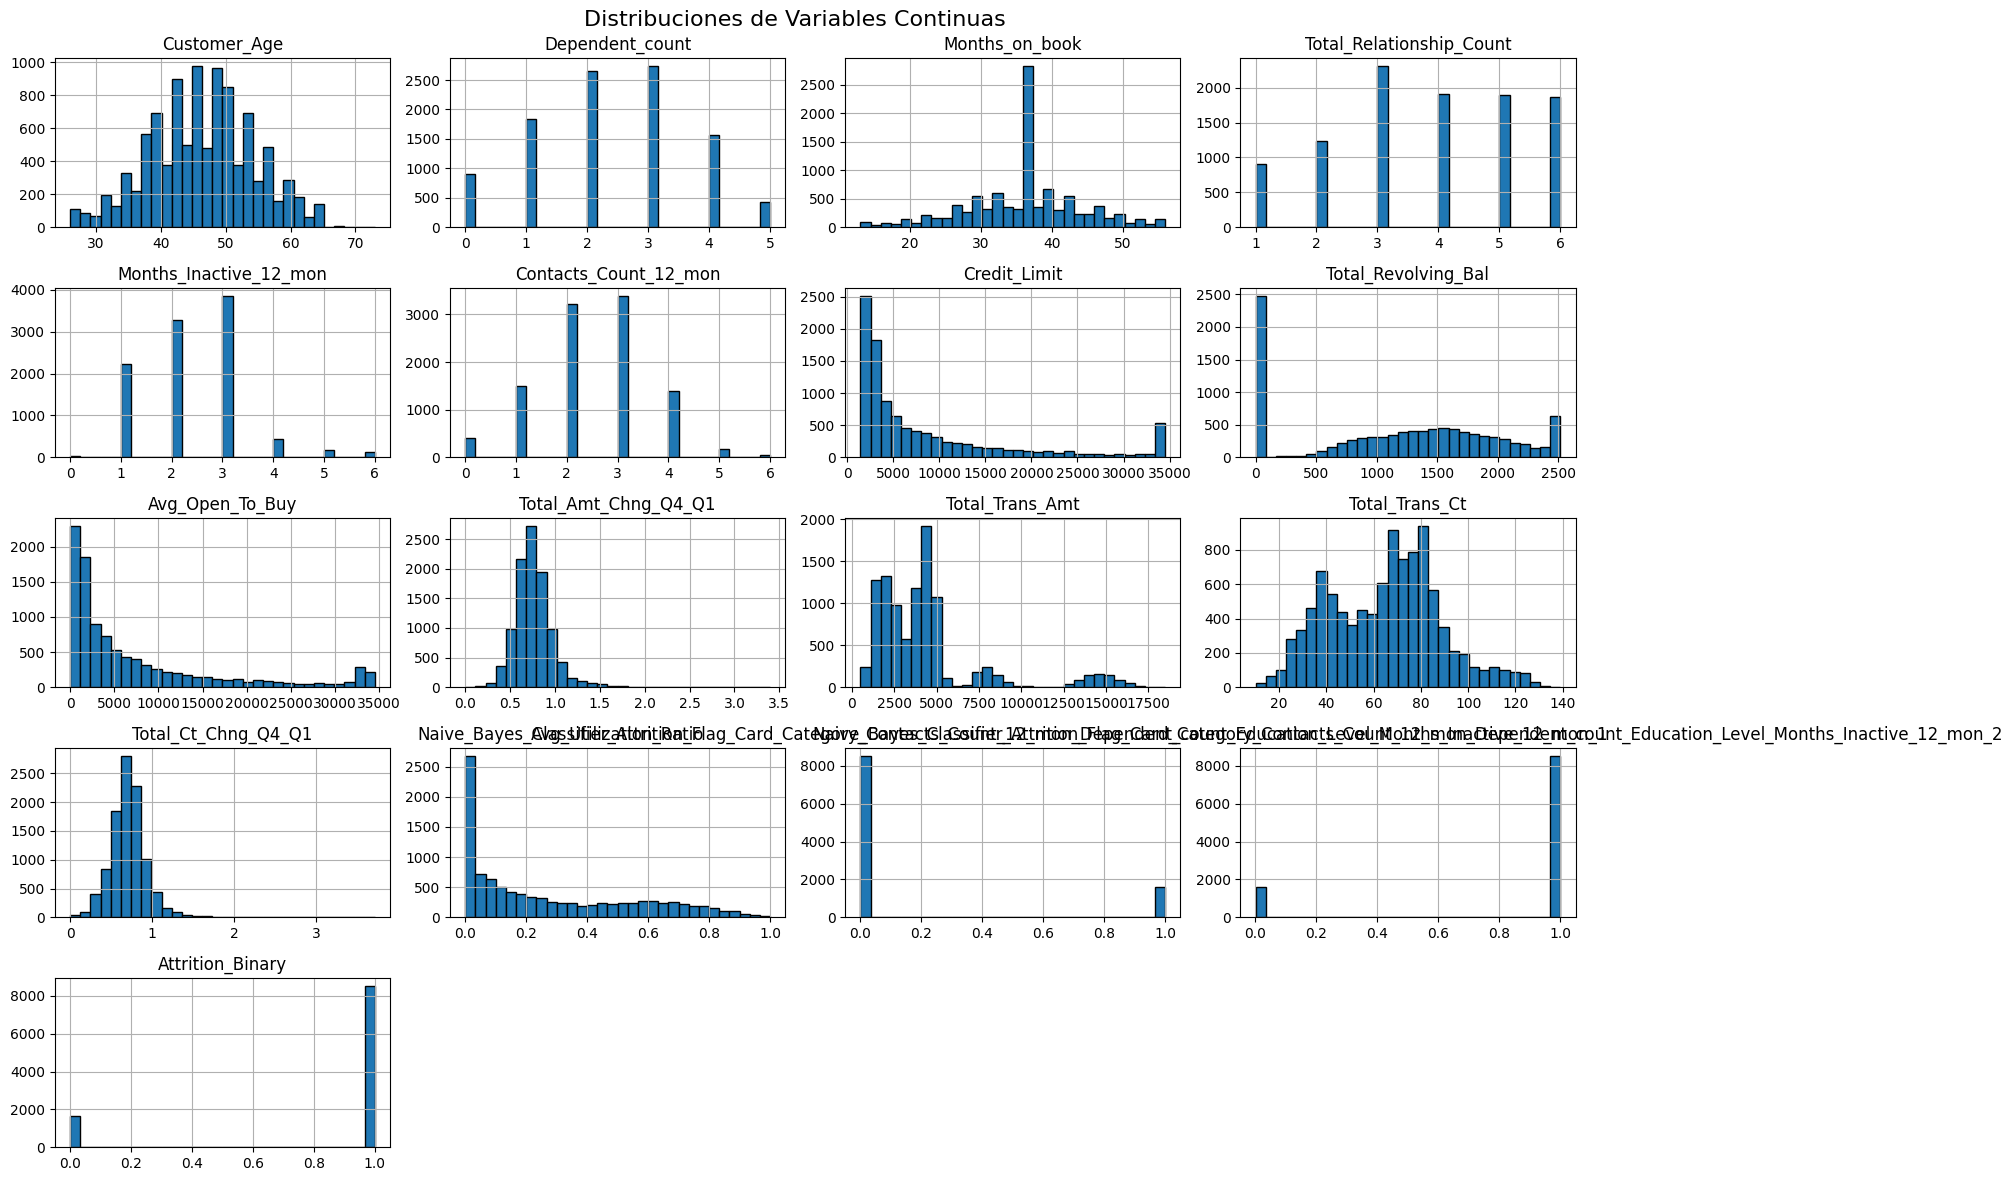

/Users/U1037319/Downloads/tmenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


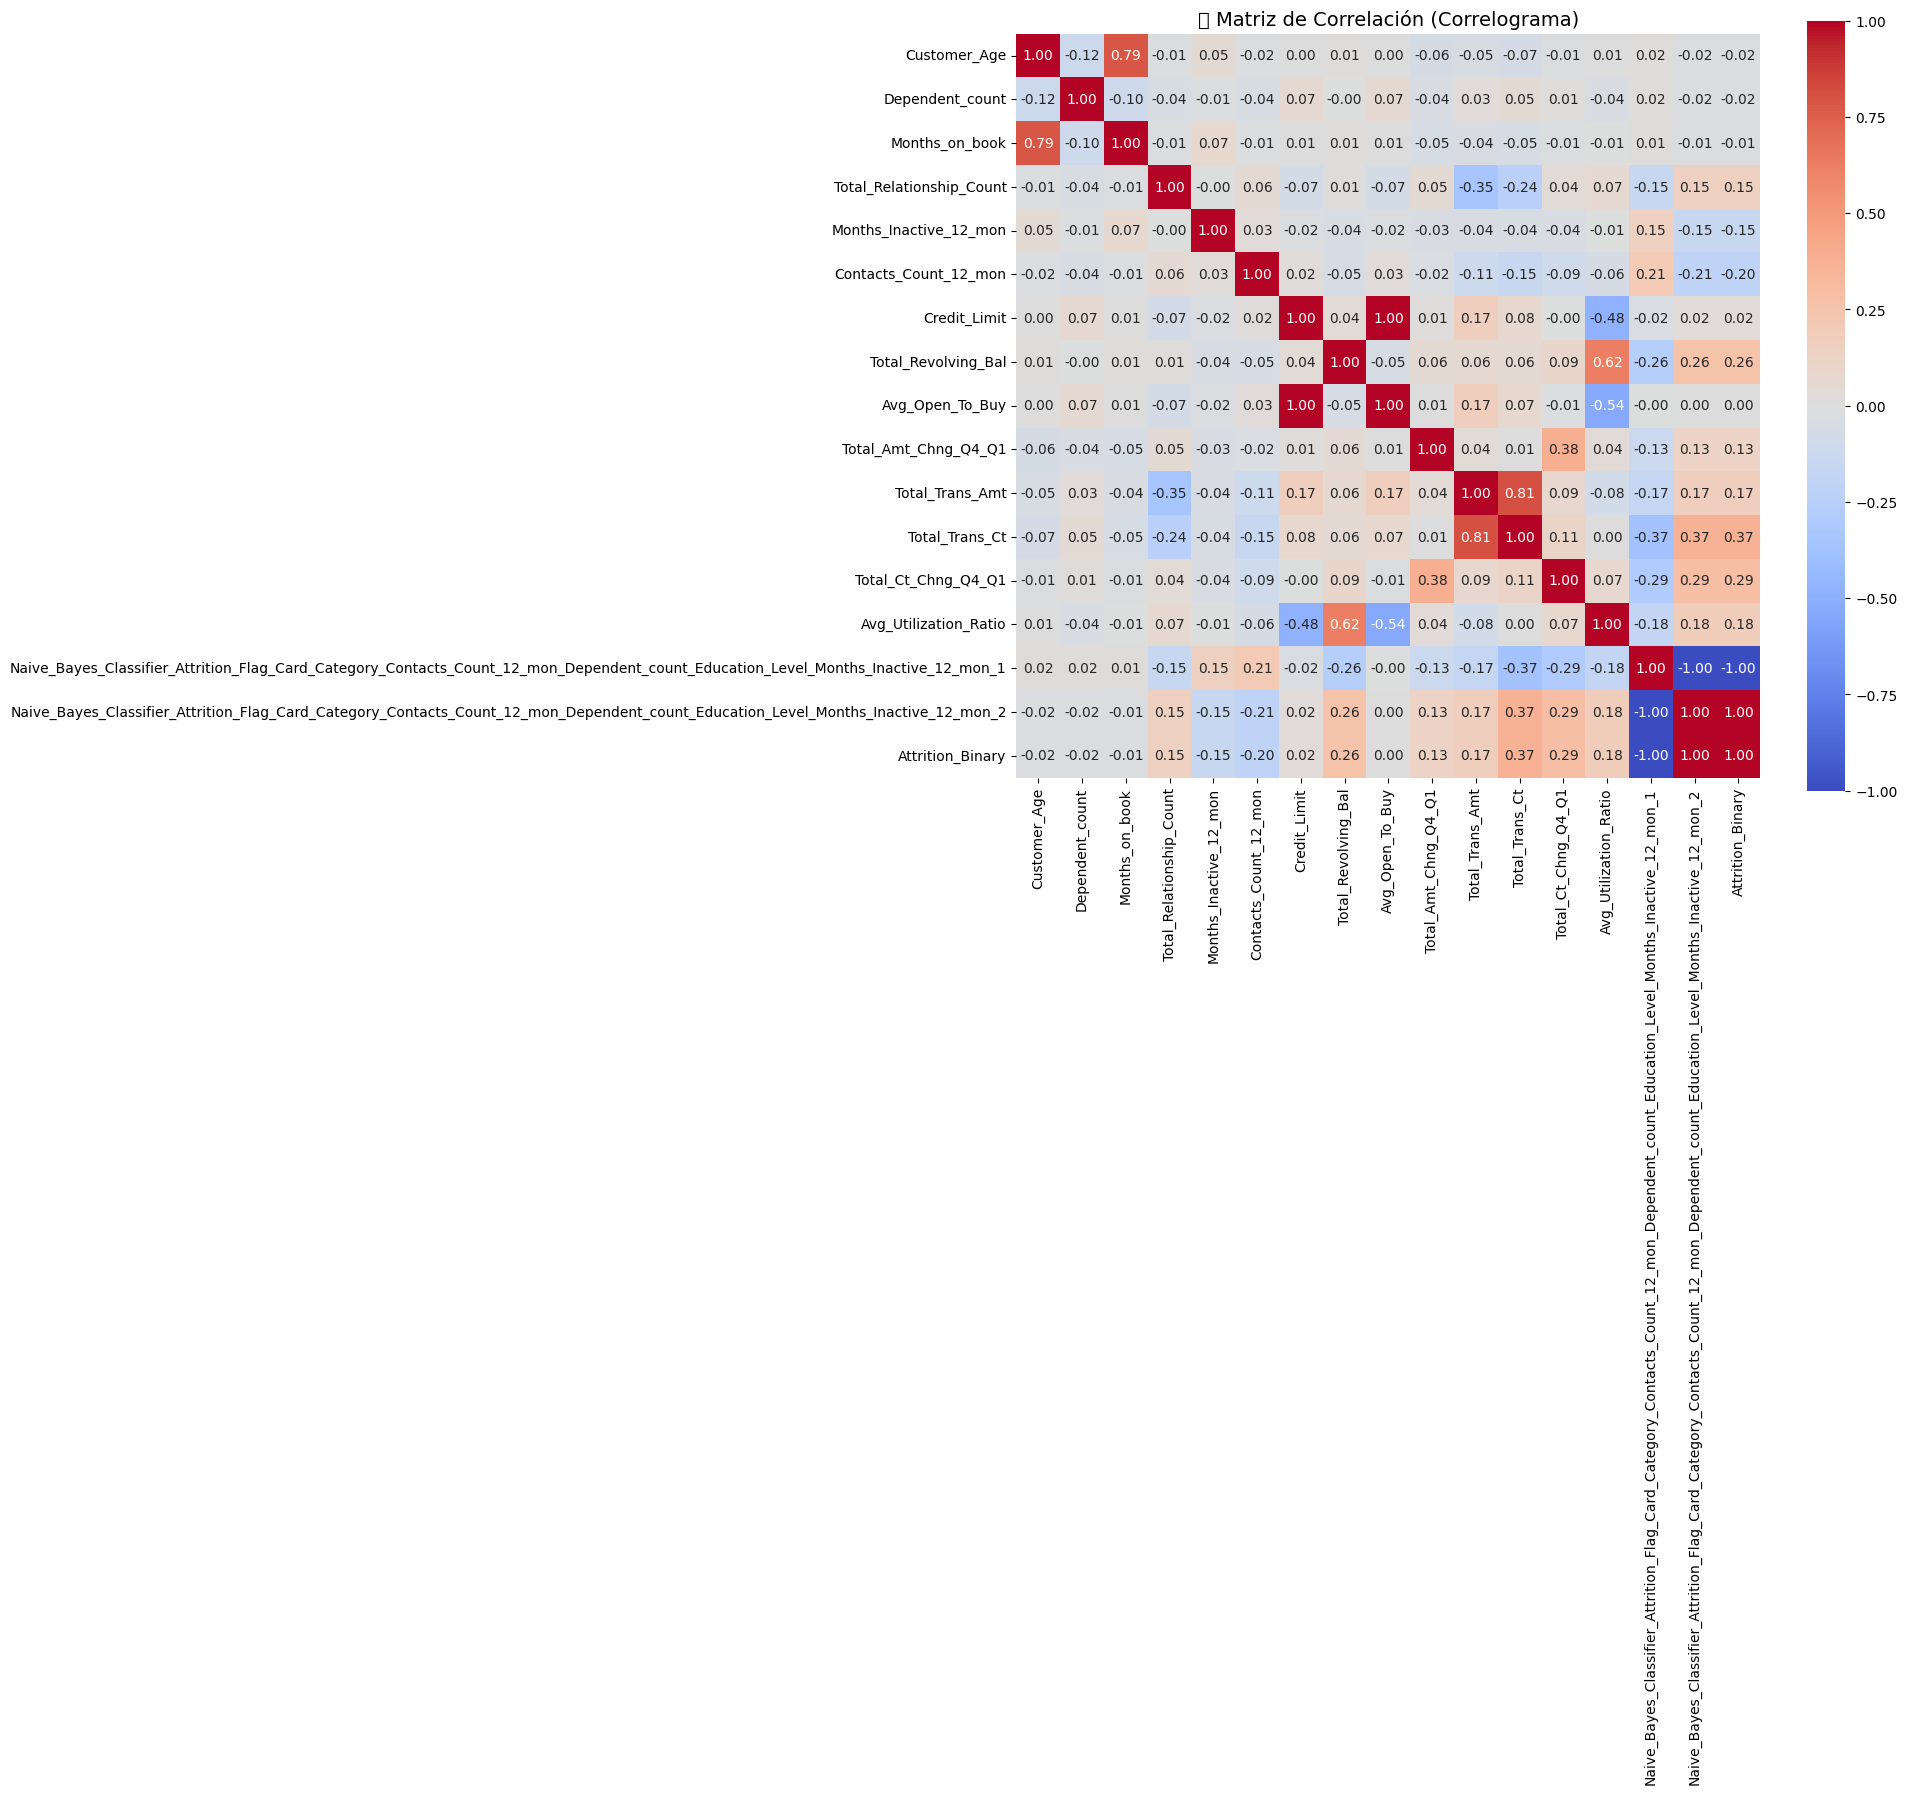

In [38]:
# Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
# Cargar los datos

# Cargar el dataset
df_inicial = pd.read_csv("BankChurners.csv")

# Convertir la columna 'Attrition_Flag' a binaria (0 = Attrited, 1 = Existing)
df_inicial["Attrition_Binary"] = df_inicial["Attrition_Flag"].map({
    "Existing Customer": 1,
    "Attrited Customer": 0
})

# Eliminar columnas categóricas (conservando la columna binaria recién creada)
df_numeric = df_inicial.select_dtypes(include=[np.number])

# Eliminar columna CLIENTNUM (es un identificador, no aporta valor predictivo)
df_numeric = df_numeric.drop(columns=["CLIENTNUM"])

# Eliminar observaciones con valores faltantes
df_numeric_clean = df_numeric.dropna()

# Estadísticas descriptivas
print("Cantidad de variables independientes continuas: " + str(df_numeric_clean.shape[1]))
print("Estadísticas Descriptivas:")
print(df_numeric_clean.describe())

# Histogramas para ver la distribución de cada variable continua
df_numeric_clean.hist(bins=30, figsize=(16, 12), edgecolor='black')
plt.suptitle("Distribuciones de Variables Continuas", fontsize=16)
plt.tight_layout()
plt.show()

# Correlograma (matriz de correlación visual)
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric_clean.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("🔗 Matriz de Correlación (Correlograma)", fontsize=14)
plt.show()



Antes de realizar el analisis de las variables  eliminamos las columnas categoricas del set de datos, adicionalmente eliminamos obervaciones con datos faltantes. En total quedaron 16 variables conrinuas para el analisis.
1. Características demográficas del cliente

- **Customer_Age**: Edad promedio de los clientes es 46.3 años, con un rango entre 26 y 73.
- **Dependent_count**: Promedio de 2.3 personas dependientes por cliente, va desde 0 hasta 5.
- **Months_on_book**: Tiempo promedio con el banco es 35.9 meses (mínimo 13, máximo 56).

2. Interacción y relación con el banco

- **Total_Relationship_Count**: Clientes tienen en promedio 3.8 productos/relaciones con el banco (1 a 6).
- **Months_Inactive_12_mon**: Inactividad en el último año, promedio de 2.3 meses.
- **Contacts_Count_12_mon**: Contacto con el banco ~2.5 veces en el último año (máx: 6).

3. Información financiera y crediticia

- **Credit_Limit**: Límite de crédito promedio ~8,632 USD (hasta 34,516 USD).
- **Total_Revolving_Bal**: Saldo promedio pendiente ~1,162 USD (máx: 2,517 USD).
- **Avg_Open_To_Buy**: Crédito disponible promedio ~7,469 USD.


4. Variables predictivas generadas

- **Naive_Bayes_Classifier_..._1**: Probabilidad de baja del cliente (0.16 en promedio).
- **Naive_Bayes_Classifier_..._2**: Probabilidad de permanencia (0.84).

HISTOGRAMAS

Podemos ver sobre los histogramas que la edad tiene una distribución simétrica, así como dependan count y months on book. Las variables Total_Trans_Amt, Avg_Open_To_Buy, Total_Trans_amt y Avg_Utilization_Ratio tienen una distribución asimétrica sesgada a la derecha.

CORRELACION

La variable Months_on_Book muestra una fuerte correlación positiva con Customer_Age (0.79), lo que sugiere que los clientes de mayor edad tienden a llevar más tiempo como usuarios del banco.

Asimismo, se observa una alta correlación positiva entre Avg_Open_To_Buy y Credit_Limit, lo que indica que los clientes que tienen un mayor cupo promedio disponible para compras también suelen contar con límites de crédito más altos.

Por otro lado, existe una correlación positiva significativa (0.62) entre Avg_Utilization_Ratio y Total_Revolving_Bal, lo cual sugiere que a medida que aumenta el uso promedio de la tarjeta, también lo hace el saldo promedio pendiente por pagar.

Finalmente, se destaca una correlación negativa moderada (-0.54) entre Avg_Open_To_Buy y Avg_Utilization_Ratio, lo que implica que a mayor utilización promedio de la tarjeta, menor será el cupo disponible para nuevas compras.

### 2. Estimación del modelo usando una red neuronal con keras [30 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test con hiperparámetros de su selección.

In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

# Dividir muestra en set de train y test
dataset=df_numeric_clean.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(dataset[:,0:15], dataset[:,16], test_size=0.20)

# Creacion de la red
model = Sequential()
model.add(Dense(12, input_dim=15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilacion del modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento red neuronal con datos de entrenamiento
history=model.fit(X_train, y_train, epochs=150, batch_size=25)

Epoch 1/150
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.5445 - loss: 464.0225
Epoch 2/150
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.7726 - loss: 16.5612
Epoch 3/150
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.8078 - loss: 7.4721
Epoch 4/150
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.8115 - loss: 5.8244
Epoch 5/150
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.8191 - loss: 5.7263
Epoch 6/150
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.8108 - loss: 7.2937
Epoch 7/150
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.7910 - loss: 35.8818
Epoch 8/150
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.8115 - loss: 6.1567
Epoch 9/150
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.8197 - loss: 7.0942
Epoch 10/150
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.8309 - loss: 5.6813
Epoch 11/150
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.8204 - loss: 8.4765
Epoch 12/150
32

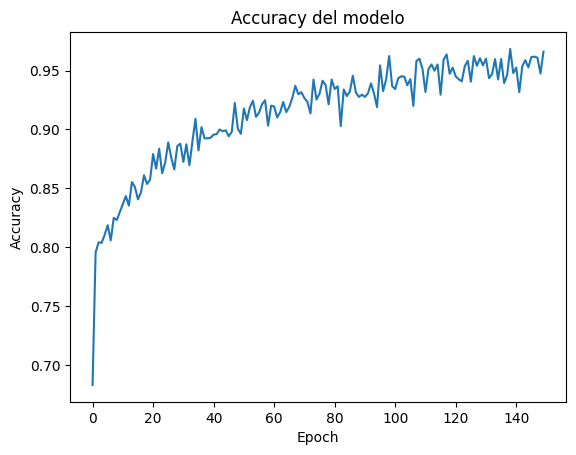

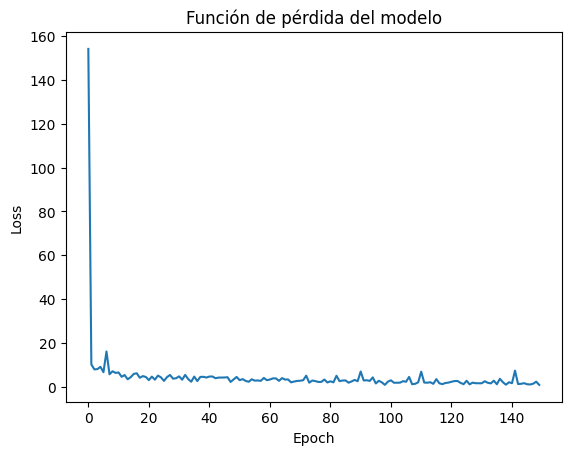

In [57]:
# Graficar accuracy del modelo
plt.plot(history.history['accuracy'])
plt.title('Accuracy del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
# Graficar la función de pérdida evaluada
plt.plot(history.history['loss'])
plt.title('Función de pérdida del modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [ ]:
# Accuracy del modelo para el set de datos de train
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.8380 - loss: 0.4431
Accuracy: 83.98


In [62]:
# Evaluacion del modelo para el set de test
test_loss, test_acc = model.evaluate(X_test, y_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.9705 - loss: 0.6344   


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.9705 - loss: 0.6344  


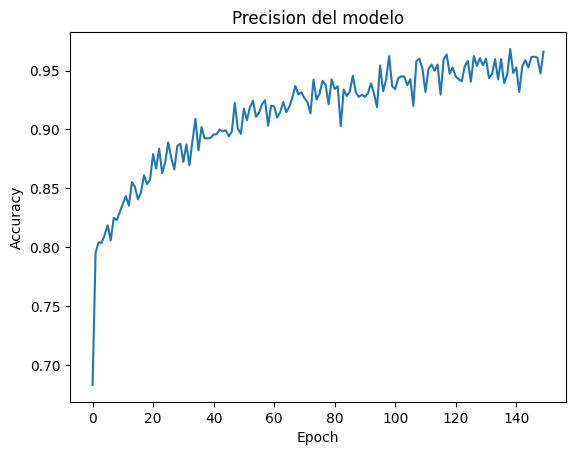

In [60]:
predicciones1 = model.predict(X_test)
redondeado1 = [round(x[0]) for x in predicciones1]
predicciones1 = (model.predict(X_test) > 0.5).astype(int)
test_loss1, test_acc1 = model.evaluate(X_test, y_test)

plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['accuracy'])
plt.show()

Comenzamos el proceso dividiendo nuestro conjunto de datos en dos subconjuntos: uno destinado al entrenamiento del modelo y otro reservado para la evaluación, conocido como set de prueba. Esta división es fundamental para poder evaluar el rendimiento del modelo con datos que no ha visto previamente y así evitar el sobreajuste.

A continuación, se definió la arquitectura de la red neuronal. En este caso, la red consta de dos capas ocultas y una capa de salida. La primera capa oculta cuenta con 12 nodos y utiliza la función de activación ReLU (Rectified Linear Unit), que es ampliamente utilizada por su eficiencia en redes profundas. La segunda capa oculta contiene 8 nodos, también con activación ReLU. Finalmente, la capa de salida consta de un único nodo, cuya función de activación es Sigmoid, ideal para tareas de clasificación binaria, ya que entrega una probabilidad entre 0 y 1 como salida.

Durante el entrenamiento del modelo, observamos el comportamiento de la función de pérdida a lo largo de las épocas. Según el gráfico correspondiente, se puede ver que la red logra reducir rápidamente la función de pérdida en las primeras etapas del entrenamiento, lo que indica una buena capacidad de aprendizaje inicial. A partir de la época 20, el descenso de la pérdida se vuelve mucho más leve, mostrando mejoras marginales.

En cuanto a los resultados obtenidos, el modelo logró un accuracy de 0.8380 en el set de entrenamiento, con una función de pérdida final de 0.4431. Por otro lado, al evaluar el modelo con el set de prueba, se obtuvo un accuracy de 0.9705, lo cual representa una mejora considerable respecto al entrenamiento. La función de pérdida en el set de prueba fue de 0.6344.

Estos resultados sugieren que el modelo generaliza bien, aunque también podría ser útil revisar si el rendimiento tan alto en el set de prueba es consistente o si se debe a una posible selección poco representativa del subconjunto de prueba.



### 3. Elección del mejor modelo [40 puntos]

Ahora construyan una función que reciba por parámetro una lista de número de capas a utilizar,  números de neuronas por capa, así como funciones de activación a utilizar.

Dicha función debe entrenar el modelo con los datos de entrenamiento, evaluar con los datos de prueba para cada una de las combinaciones de hiperparámetros y encontrar cuál es la mejor combinación de hiperprámetros.  

Una vez hecho este procedimiento respondan a la siguiente pregunta:
 
¿Cómo argumenta que esta sea la selección óptima de hiperparámetros?

In [4]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)